In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = fetch_california_housing()


In [3]:
df1=pd.DataFrame(housing.data)
df2=pd.DataFrame(housing.target)
df=pd.concat([df1,df2], axis=1)
df.columns=['Income','House_Age','Average_Rooms','Average_Bedrooms','Block_Population','Average_Occurancy','Latitude','Longitutde','House_Price']

In [4]:
df.head()

,Income,House_Age,Average_Rooms,Average_Bedrooms,Block_Population,Average_Occurancy,Latitude,Longitutde,House_Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Set seaborn style
sns.set_style("whitegrid")

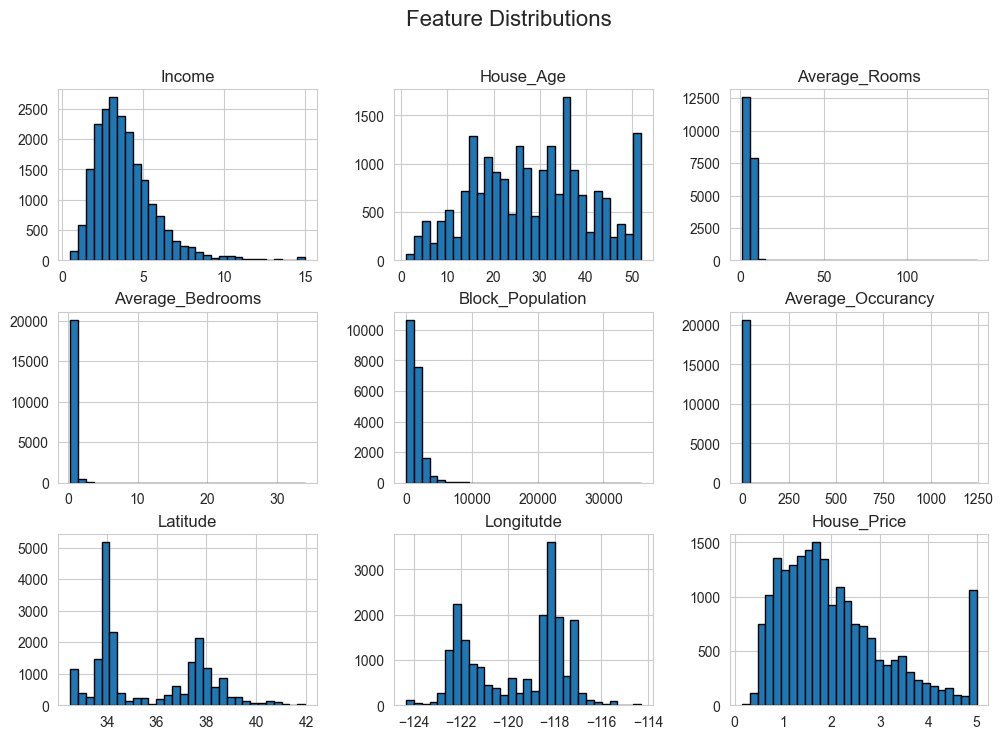

In [6]:
# Histograms of Features
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

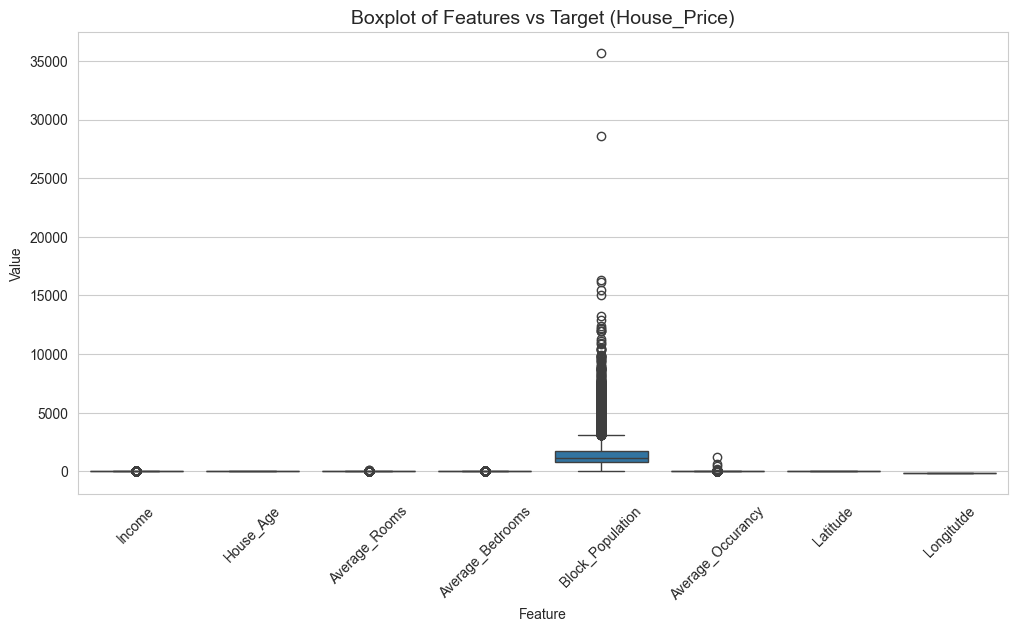

In [8]:
# 4. Boxplots for Target vs Features
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars="House_Price", var_name="Feature", value_name="Value")
sns.boxplot(x="Feature", y="Value", data=df_melted)
plt.xticks(rotation=45)
plt.title("Boxplot of Features vs Target (House_Price)", fontsize=14)
plt.show()

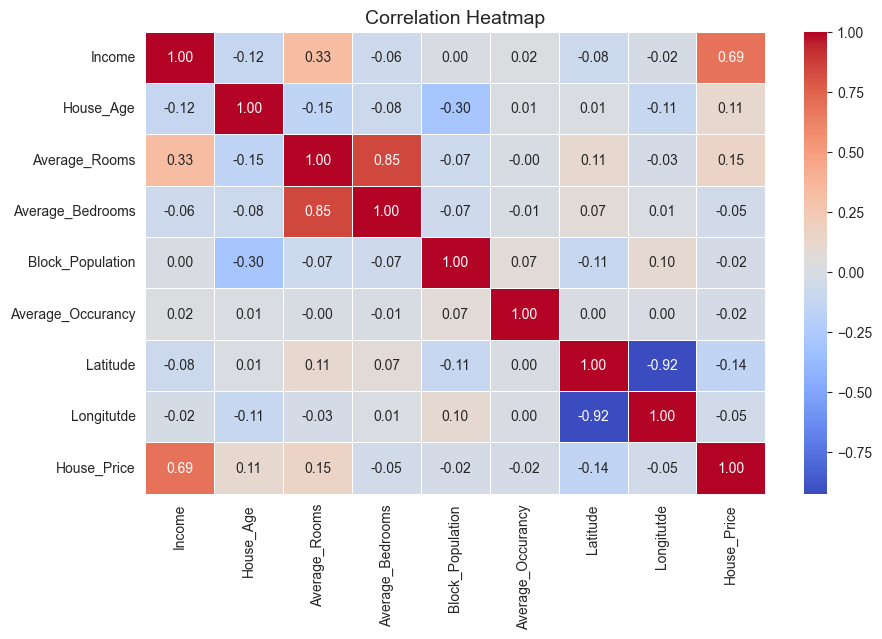

In [9]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

### 1. Variance Threshold Filtering

If a feature has low variance, it means that its values don’t change much across different samples.

Features with nearly constant values don’t contribute much to learning and can be removed.

In [10]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold= 0.5)  # Adjust threshold as needed
X_var_filtered = var_thresh.fit_transform(df.drop(columns=["House_Price"]))
selected_features_var = df.drop(columns=["House_Price"]).columns[var_thresh.get_support()]

In [11]:
selected_features_var

Index(['Income', 'House_Age', 'Average_Rooms', 'Block_Population',
       'Average_Occurancy', 'Latitude', 'Longitutde'],
      dtype='object')

In [12]:
# Compute variances of all features (excluding 'House_Price')
variances = pd.DataFrame({
    "Feature": df.drop(columns=["House_Price"]).columns,
    "Variance": np.var(df.drop(columns=["House_Price"]), axis=0)
})

# Identify selected features based on variance threshold
variances["Selected"] = variances["Feature"].isin(selected_features_var)

# Display the variance values
print(variances)


                             Feature      Variance  Selected
Income                        Income  3.609148e+00      True
House_Age                  House_Age  1.583886e+02      True
Average_Rooms          Average_Rooms  6.121236e+00      True
Average_Bedrooms    Average_Bedrooms  2.245806e-01     False
Block_Population    Block_Population  1.282408e+06      True
Average_Occurancy  Average_Occurancy  1.078648e+02      True
Latitude                    Latitude  4.562072e+00      True
Longitutde                Longitutde  4.013945e+00      True


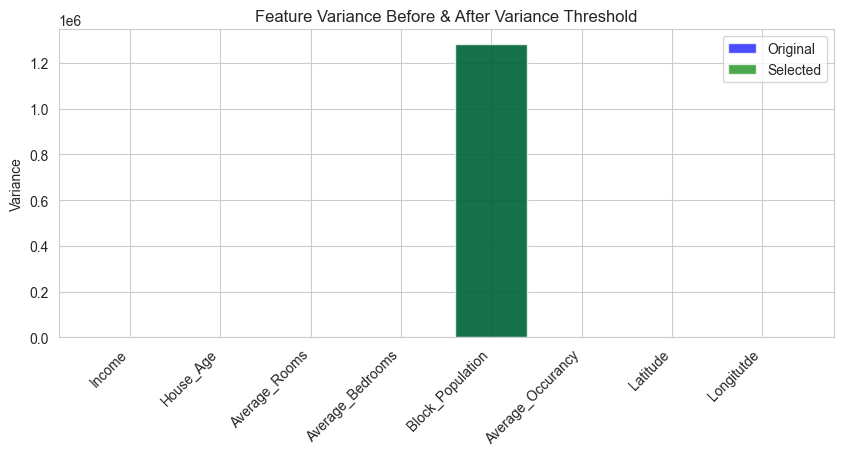

In [13]:
# Visualization: Variance of Features
plt.figure(figsize=(10, 4))
variances = np.var(df.drop(columns=["House_Price"]), axis=0)
plt.bar(df.drop(columns=["House_Price"]).columns, variances, color='blue', alpha=0.7, label="Original")
plt.bar(selected_features_var, variances[var_thresh.get_support()], color='green', alpha=0.7, label="Selected")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Variance")
plt.title("Feature Variance Before & After Variance Threshold")
plt.legend()
plt.show()

In [14]:
removed_features = set(df.drop(columns=["House_Price"]).columns) - set(selected_features_var)
print("Removed Features:", removed_features)

Removed Features: {'Average_Bedrooms'}


### Correlation Threshold

If two features are highly correlated (above a threshold like 0.85), one of them can be removed to avoid redundancy.

This helps in reducing multicollinearity (which affects models like linear regression).

In [15]:
# Compute correlation matrix
corr_matrix = df.drop(columns=["House_Price"]).corr().abs()

# Set threshold for high correlation
corr_threshold = 0.85

In [16]:
# Find features that are highly correlated
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > corr_threshold)]

In [17]:
upper_triangle

,Income,House_Age,Average_Rooms,Average_Bedrooms,Block_Population,Average_Occurancy,Latitude,Longitutde
Income,NaN,0.119034,0.326895,0.062040,0.004834,0.018766,0.079809,0.015176
House_Age,NaN,NaN,0.153277,0.077747,0.296244,0.013191,0.011173,0.108197
Average_Rooms,NaN,NaN,NaN,0.847621,0.072213,0.004852,0.106389,0.027540
Average_Bedrooms,NaN,NaN,NaN,NaN,0.066197,0.006181,0.069721,0.013344
Block_Population,NaN,NaN,NaN,NaN,NaN,0.069863,0.108785,0.099773
Average_Occurancy,NaN,NaN,NaN,NaN,NaN,NaN,0.002366,0.002476
Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.924664
Longitutde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


correlation matrices are symmetric (i.e., corr(𝑋,𝑌)=corr(𝑌,
𝑋
)
), so we only need to check one half to avoid duplicate checks.

In [18]:
# Remove highly correlated features
df_corr_filtered = df.drop(columns=to_drop)
print("Removed Features (High Correlation):", to_drop)

Removed Features (High Correlation): ['Longitutde']


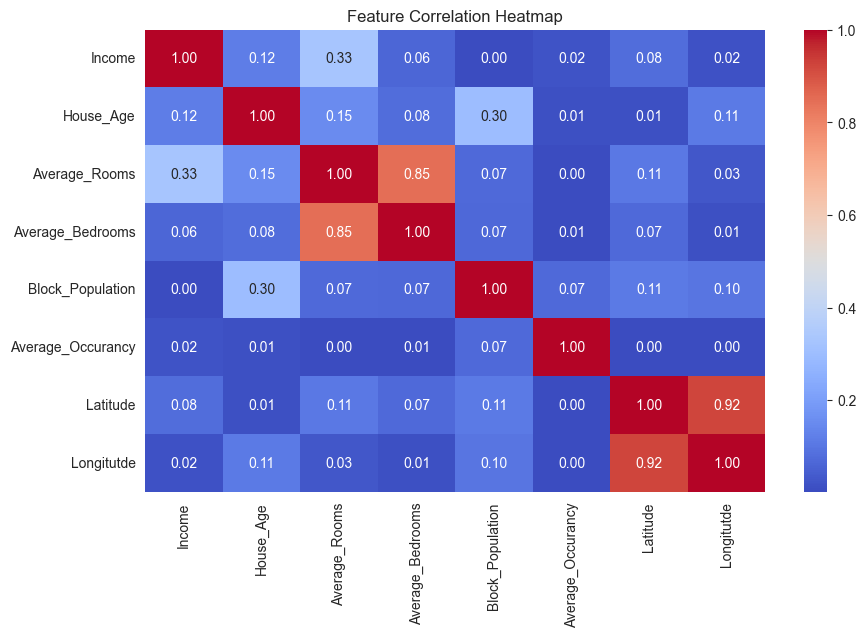

In [19]:
# Visualization: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Mean Absolute Deviation

MAD measures how much each feature deviates from the mean.

If a feature has very low MAD, its values are almost constant, meaning it carries little useful information.

In [20]:
# Compute Mean Absolute Deviation for each feature
mad_values = df.drop(columns=["House_Price"]).apply(lambda x: np.mean(np.abs(x - np.mean(x))))

# Set MAD threshold (adjust as needed)
mad_threshold = 1 

In [21]:
# Find features with low MAD
low_mad_features = mad_values[mad_values < mad_threshold].index.tolist()

# Remove features with low MAD
df_mad_filtered = df.drop(columns=low_mad_features)

print("Removed Features (Low MAD):", low_mad_features)

Removed Features (Low MAD): ['Average_Bedrooms', 'Average_Occurancy']


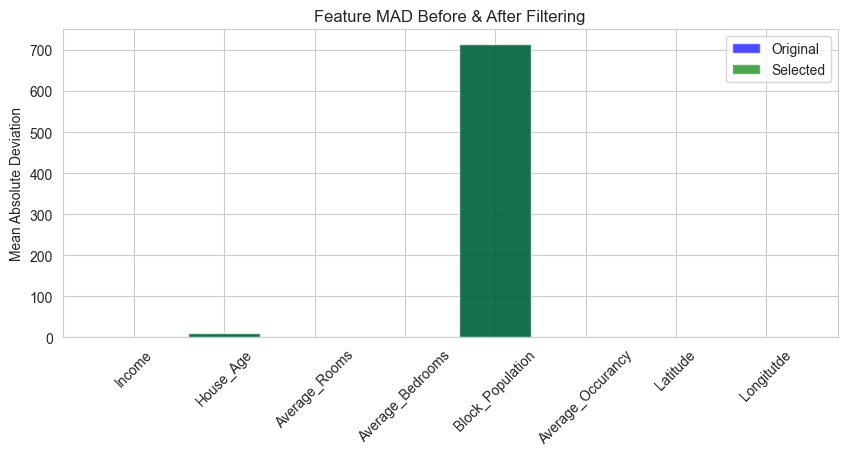

In [22]:
# Visualization: MAD of Features
plt.figure(figsize=(10, 4))
plt.bar(df.drop(columns=["House_Price"]).columns, mad_values, color='blue', alpha=0.7, label="Original")
plt.bar(df_mad_filtered.drop(columns=["House_Price"]).columns, mad_values[df_mad_filtered.drop(columns=["House_Price"]).columns], 
        color='green', alpha=0.7, label="Selected")
plt.xticks(rotation=45)
plt.ylabel("Mean Absolute Deviation")
plt.title("Feature MAD Before & After Filtering")
plt.legend()
plt.show()

### Mutual Information 

In [23]:
df.columns

Index(['Income', 'House_Age', 'Average_Rooms', 'Average_Bedrooms',
       'Block_Population', 'Average_Occurancy', 'Latitude', 'Longitutde',
       'House_Price'],
      dtype='object')

In [24]:
from sklearn.feature_selection import mutual_info_regression

In [25]:
X = df.drop(columns='House_Price')
y = df['House_Price']

In [26]:
mi_scores = mutual_info_regression(X, y)

In [27]:
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)
print(mi_df)

             Feature  Mutual_Information
7         Longitutde            0.399034
0             Income            0.387032
6           Latitude            0.369707
2      Average_Rooms            0.103143
5  Average_Occurancy            0.072634
1          House_Age            0.033274
3   Average_Bedrooms            0.024508
4   Block_Population            0.021243


 MI score near 0 is likely irrelavant

C:\Users\manav\AppData\Local\Temp\ipykernel_13736\2049156689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual_Information', y='Feature', data=mi_df, palette='viridis')


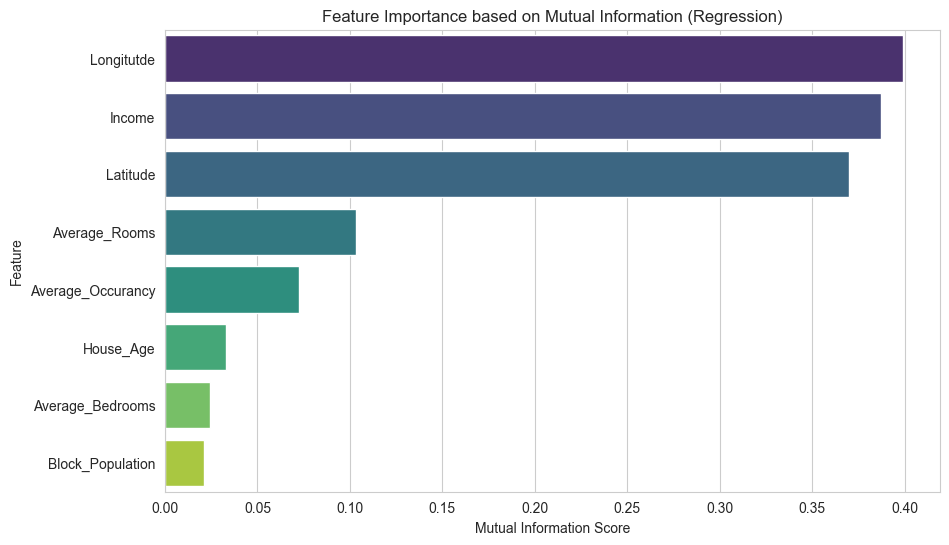

In [28]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual_Information', y='Feature', data=mi_df, palette='viridis')
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title("Feature Importance based on Mutual Information (Regression)")
plt.show()

### Information Gain

In [29]:
# Let's assume we split into 3 categories: low, medium, high price range
df['House_Price_Binned'] = pd.cut(df['House_Price'], bins=3, labels=['low', 'medium', 'high'])
df.head()

,Income,House_Age,Average_Rooms,Average_Bedrooms,Block_Population,Average_Occurancy,Latitude,Longitutde,House_Price,House_Price_Binned
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,high
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,high
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,high
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,high
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,high


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop(columns= ['House_Price', 'House_Price_Binned'])
y = df['House_Price_Binned']

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Initialize and train the DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [34]:
feature_importances = classifier.feature_importances_


In [35]:
# Output the feature importances (which relate to information gain)
for feature, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature}, Information Gain (Importance): {importance:.4f}")

Feature: Income, Information Gain (Importance): 0.3160
Feature: House_Age, Information Gain (Importance): 0.0648
Feature: Average_Rooms, Information Gain (Importance): 0.0729
Feature: Average_Bedrooms, Information Gain (Importance): 0.0520
Feature: Block_Population, Information Gain (Importance): 0.0613
Feature: Average_Occurancy, Information Gain (Importance): 0.1416
Feature: Latitude, Information Gain (Importance): 0.1469
Feature: Longitutde, Information Gain (Importance): 0.1446


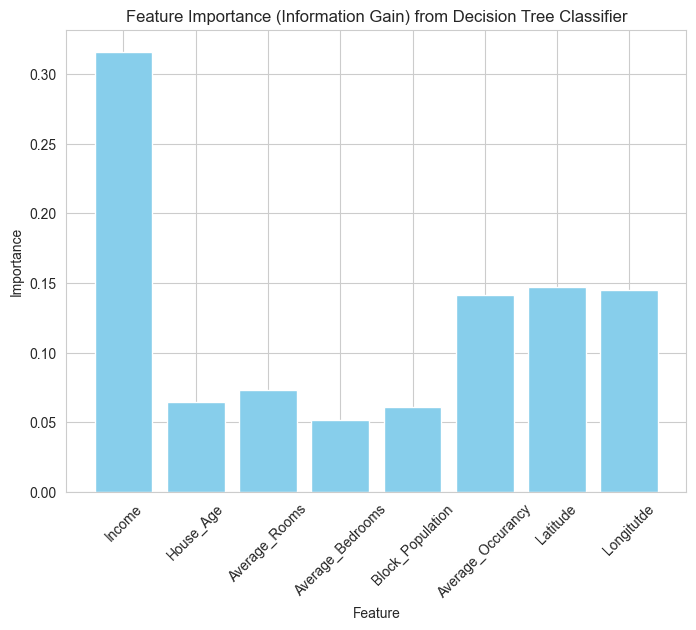

In [36]:
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(X.columns, feature_importances, color='skyblue')
plt.title('Feature Importance (Information Gain) from Decision Tree Classifier')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation =45)
plt.show()